## <font color='black'> Mounting Libraries and packages </font>

In [23]:
import tensorflow

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
import cv2

import os
import time
import pandas as pd
from keras import backend as K
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.layers import MaxPool2D ,ReLU,Lambda,TimeDistributed,Dense, GlobalAveragePooling2D, Dropout,LSTM,Conv2D,MaxPooling2D,Flatten,BatchNormalization

In [24]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
import cv2

In [25]:
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

## <font color='black'> Collecting dataset </font>

In [3]:
def create_new_training_data(image_path,height,width):
    data=[]
    labels=[]
    classes=10
    
    for i in range(classes):
        img_path=os.path.join(image_path,str(i))
        k=0
        for img in os.listdir(img_path):
            im=cv2.imread(image_path+'/'+str(i)+'/'+img)
            im = cv2.resize(im, (width,height), interpolation = cv2.INTER_AREA)
            path = 'Dataset/Train/'+str(i)
            cv2.imwrite(os.path.join(path ,str(k)+'.jpg'), im)
            k+=1

In [5]:
image_path='Dataset'
create_new_training_data(image_path,120,160)

In [5]:
def create_dataframe(images_path):
    data=[]
    labels=[]
    classes=10
    for i in range(classes):
        img_path=os.path.join(images_path,str(i))
        for img in os.listdir(img_path):
            im=cv2.imread(images_path+'/'+str(i)+'/'+img)
            im= cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
            im = np.array(im)
            data.append(im)
            labels.append(i)
    data = np.array(data)
    labels = np.array(labels)
    return data,labels

In [6]:
data,labels=create_dataframe('Dataset/Train')

In [36]:
from numpy import load
data=load('data.npy')
labels=load('labels.npy')

In [37]:
data.shape

(3600, 120, 160)

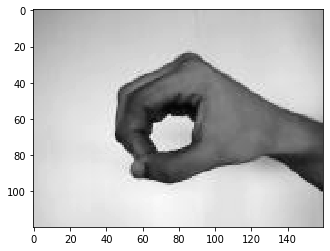

In [38]:
plt.imshow(data[0],cmap='gray')

In [39]:
labels.shape

(3600,)

## <font color='black'> segmenting out a test set </font>

In [40]:
x, x_final_test, y, y_final_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [34]:
k=0
for j in x_final_test:
    path = 'Dataset/Test'
    cv2.imwrite(os.path.join(path ,str(k)+'.jpg'), j)
    k+=1
    

In [41]:
print(x.shape)
x_final_test.shape

(3240, 120, 160)


(360, 120, 160)

## <font color='black'> Splitting into train and validation data </font>

In [42]:
from sklearn.model_selection import train_test_split

x=data
y=labels


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train=x_train/255
x_test=x_test/255
print("training shape: ",x_train.shape, y_train.shape)
print("testing shape: ",x_test.shape, y_test.shape)

training shape:  (2880, 120, 160) (2880,)
testing shape:  (720, 120, 160) (720,)


In [43]:
# Hot Encoding 

y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)

In [44]:
import collections
collections.Counter(y_train)

Counter({9: 293,
         6: 292,
         5: 297,
         3: 301,
         0: 267,
         2: 281,
         1: 287,
         4: 279,
         7: 291,
         8: 292})

In [45]:
x_train.shape

(2880, 120, 160)

## <font color='black'> Creating an SVM model</font>

In [46]:
def svm_data(x):
    height=x.shape[2]
    width=x.shape[1]
    size=x.shape[0]
    x=x.reshape(size,height*width)
    #x=x/255
    return x

In [47]:
x_train_svm=svm_data(x_train)
x_test_svm=svm_data(x_test)

In [48]:
x_train_svm

array([[0.59607843, 0.6       , 0.60784314, ..., 0.58823529, 0.58431373,
        0.58431373],
       [0.80784314, 0.80784314, 0.80784314, ..., 0.39215686, 0.35686275,
        0.34117647],
       [0.60784314, 0.65098039, 0.65882353, ..., 0.01960784, 0.00392157,
        0.01960784],
       ...,
       [0.43921569, 0.44313725, 0.44705882, ..., 0.1372549 , 0.14117647,
        0.14117647],
       [0.84313725, 0.84313725, 0.84313725, ..., 0.88627451, 0.89019608,
        0.89019608],
       [0.65882353, 0.6627451 , 0.6627451 , ..., 0.25490196, 0.25490196,
        0.24705882]])

In [49]:
from sklearn import svm

classifier = svm.SVC(gamma=1e-03)
#fit to the trainin data
classifier.fit(x_train_svm,y_train)

SVC(gamma=0.001)

In [50]:
y_pred=classifier.predict(x_test_svm)

In [51]:
print(y_pred)
y_test

[3 8 9 9 0 9 4 9 7 4 6 0 2 0 0 8 8 4 0 5 7 5 2 7 3 1 2 1 8 8 2 1 0 4 8 6 2
 2 2 2 8 8 8 0 4 3 2 4 5 8 5 2 0 1 6 8 2 1 0 4 0 7 4 1 0 2 4 4 7 8 2 4 1 4
 7 2 8 8 2 4 0 1 3 6 2 4 7 1 6 3 1 0 1 7 9 3 2 1 8 8 5 3 0 9 2 5 7 8 2 0 2
 6 0 6 6 5 5 3 5 9 8 9 0 3 4 2 8 0 9 2 6 8 7 8 3 3 9 0 0 5 8 2 8 7 8 2 9 0
 0 7 5 9 0 5 8 0 2 1 4 8 8 7 7 2 7 3 6 6 9 8 8 5 3 8 8 4 3 4 8 8 7 4 1 7 2
 7 2 9 5 8 6 5 2 2 9 0 3 5 7 2 1 4 8 4 3 8 0 4 9 7 0 2 0 6 0 0 6 7 4 4 1 8
 5 5 6 6 8 0 3 5 9 6 8 2 1 2 4 6 4 2 7 9 1 5 6 9 5 6 8 7 8 0 1 0 1 0 0 7 2
 4 6 4 1 8 5 9 3 4 5 8 5 8 4 5 8 9 2 7 0 4 9 0 4 8 8 2 9 1 8 9 5 5 4 9 9 9
 3 2 4 0 3 0 6 4 5 9 8 9 7 5 3 1 2 3 3 7 6 9 3 7 0 3 4 9 5 7 9 0 0 2 9 1 9
 7 0 2 0 1 8 2 6 2 0 8 8 0 1 2 5 6 3 5 6 5 0 0 2 0 2 5 4 2 2 1 2 9 2 9 8 3
 6 5 8 3 7 0 5 3 4 3 5 7 2 3 4 4 1 8 8 3 2 8 0 4 7 9 5 8 5 8 0 0 2 8 2 9 2
 2 1 1 1 9 4 7 9 7 6 8 5 0 5 0 4 5 3 6 6 2 4 8 3 6 3 9 7 5 2 1 3 2 7 4 3 3
 8 1 2 2 9 9 7 0 1 2 7 9 9 7 5 4 4 1 4 8 3 6 1 8 4 6 0 2 1 3 2 0 0 4 2 0 5
 1 0 8 7 8 0 6 7 7 5 0 0 

array([3, 4, 9, 9, 0, 9, 4, 0, 7, 4, 6, 0, 2, 0, 0, 7, 8, 4, 0, 5, 2, 5,
       2, 6, 3, 1, 1, 1, 7, 8, 2, 6, 0, 7, 8, 6, 3, 2, 2, 2, 7, 8, 8, 0,
       4, 3, 1, 4, 5, 8, 5, 2, 0, 1, 6, 8, 2, 1, 0, 4, 0, 7, 4, 1, 0, 2,
       4, 3, 7, 8, 2, 4, 1, 5, 7, 3, 2, 8, 2, 4, 0, 1, 6, 6, 2, 7, 7, 6,
       6, 3, 1, 0, 1, 7, 9, 3, 6, 1, 3, 4, 5, 3, 0, 9, 2, 2, 7, 8, 1, 0,
       2, 6, 0, 6, 6, 5, 5, 3, 5, 9, 8, 9, 0, 3, 4, 2, 8, 0, 9, 2, 6, 2,
       7, 7, 3, 3, 9, 0, 0, 5, 2, 1, 8, 7, 8, 2, 9, 0, 0, 3, 5, 9, 0, 5,
       8, 6, 2, 1, 4, 8, 8, 4, 7, 2, 5, 3, 6, 6, 9, 8, 8, 5, 4, 7, 8, 4,
       3, 5, 8, 8, 7, 4, 1, 7, 2, 7, 3, 9, 5, 8, 6, 5, 4, 1, 9, 0, 2, 5,
       7, 1, 1, 4, 8, 4, 3, 4, 0, 3, 9, 7, 0, 3, 0, 6, 0, 0, 6, 7, 4, 4,
       1, 8, 5, 5, 6, 6, 8, 0, 3, 5, 9, 6, 4, 2, 2, 2, 4, 6, 4, 2, 7, 9,
       1, 1, 6, 9, 5, 6, 7, 7, 8, 0, 1, 0, 1, 0, 0, 7, 2, 4, 6, 4, 1, 8,
       5, 0, 7, 4, 9, 8, 0, 8, 4, 7, 7, 9, 2, 4, 0, 4, 9, 0, 4, 8, 8, 2,
       9, 1, 7, 9, 5, 5, 4, 9, 9, 9, 3, 2, 3, 0, 4,

In [52]:
#Accuracy

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8347222222222223


In [53]:
# Precision and recall

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, y_pred)))

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.99      0.88      0.93        93
           1       0.92      0.78      0.84        73
           2       0.70      0.81      0.75        79
           3       0.71      0.66      0.68        59
           4       0.86      0.73      0.79        81
           5       0.83      0.95      0.89        63
           6       1.00      0.84      0.91        68
           7       0.84      0.75      0.79        69
           8       0.69      0.99      0.81        68
           9       0.90      0.96      0.93        67

    accuracy                           0.83       720
   macro avg       0.84      0.83      0.83       720
weighted avg       0.85      0.83      0.84       720




In [54]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:
[[82  0  3  0  0  1  0  0  0  7]
 [ 0 57 12  1  0  1  0  0  2  0]
 [ 0  2 64  3  1  2  0  1  6  0]
 [ 0  0  8 39  5  0  0  3  4  0]
 [ 0  0  1 10 59  3  0  3  5  0]
 [ 0  0  0  0  2 60  0  1  0  0]
 [ 1  2  3  1  0  1 57  1  2  0]
 [ 0  1  1  1  2  1  0 52 11  0]
 [ 0  0  0  0  0  0  0  1 67  0]
 [ 0  0  0  0  0  3  0  0  0 64]]


In [55]:
collections.Counter(y_test)


Counter({3: 59, 4: 81, 9: 67, 0: 93, 7: 69, 6: 68, 2: 79, 8: 68, 5: 63, 1: 73})

## <font color='black'> Prediction on Test set </font>



In [56]:
x_final_test=load('test_data.npy')
y_final_test=load('test_labels.npy')


In [57]:
y_final_test

array([7, 0, 5, 2, 2, 9, 2, 5, 3, 0, 9, 1, 1, 3, 1, 6, 6, 5, 5, 1, 0, 9,
       8, 0, 9, 2, 8, 9, 2, 9, 4, 6, 1, 8, 2, 2, 9, 3, 3, 8, 1, 1, 0, 2,
       9, 3, 4, 0, 4, 1, 7, 8, 1, 9, 0, 5, 4, 0, 3, 3, 6, 7, 1, 2, 0, 6,
       5, 5, 1, 7, 3, 0, 1, 9, 6, 5, 9, 4, 6, 0, 0, 5, 8, 6, 1, 6, 7, 2,
       2, 5, 8, 2, 8, 4, 6, 9, 6, 6, 1, 6, 2, 0, 1, 3, 0, 0, 3, 8, 8, 3,
       5, 9, 9, 7, 1, 1, 7, 8, 9, 3, 2, 0, 6, 0, 4, 8, 9, 4, 6, 7, 3, 9,
       4, 2, 4, 8, 6, 5, 9, 0, 3, 7, 3, 5, 4, 1, 2, 4, 9, 0, 7, 9, 3, 0,
       4, 2, 2, 7, 8, 9, 5, 8, 4, 8, 2, 4, 4, 3, 5, 2, 1, 3, 2, 3, 7, 2,
       5, 1, 0, 0, 3, 3, 8, 4, 1, 7, 7, 5, 7, 4, 3, 3, 7, 2, 8, 5, 8, 5,
       7, 8, 4, 5, 7, 8, 7, 3, 0, 0, 6, 4, 5, 2, 4, 8, 6, 2, 9, 6, 9, 7,
       9, 4, 7, 3, 3, 4, 4, 9, 0, 5, 2, 9, 5, 0, 3, 7, 5, 9, 6, 7, 9, 3,
       1, 8, 0, 2, 8, 2, 6, 7, 3, 6, 4, 7, 1, 9, 1, 2, 6, 4, 3, 0, 0, 0,
       4, 3, 8, 8, 5, 2, 1, 5, 7, 7, 4, 1, 7, 5, 6, 8, 0, 6, 9, 2, 5, 8,
       5, 4, 2, 5, 1, 1, 0, 6, 4, 8, 0, 9, 5, 6, 7,

In [58]:
x_svm=svm_data(x_final_test)

In [59]:
test_pred=classifier.predict(x_svm)

In [165]:
test_pred

array([7, 0, 5, 2, 2, 9, 2, 5, 3, 0, 9, 5, 1, 3, 1, 6, 6, 5, 5, 1, 0, 9,
       8, 0, 9, 2, 8, 9, 2, 9, 4, 2, 2, 8, 2, 2, 9, 3, 3, 8, 1, 1, 0, 2,
       9, 2, 4, 0, 4, 2, 7, 8, 1, 9, 0, 5, 4, 9, 3, 3, 6, 7, 1, 2, 0, 6,
       4, 5, 1, 7, 8, 0, 2, 9, 6, 5, 9, 8, 6, 0, 0, 5, 8, 6, 1, 6, 3, 2,
       2, 5, 8, 2, 8, 3, 6, 9, 8, 6, 1, 6, 2, 9, 1, 3, 0, 9, 3, 8, 8, 2,
       5, 9, 9, 3, 8, 1, 7, 8, 9, 3, 2, 0, 6, 0, 4, 8, 9, 4, 6, 7, 3, 9,
       5, 2, 4, 1, 6, 3, 9, 0, 8, 7, 3, 5, 4, 4, 2, 4, 9, 0, 7, 9, 3, 0,
       4, 2, 2, 7, 8, 9, 5, 8, 4, 8, 2, 4, 4, 0, 5, 2, 1, 3, 8, 3, 7, 8,
       5, 1, 0, 0, 3, 3, 8, 3, 1, 7, 7, 5, 7, 4, 3, 4, 7, 2, 8, 5, 8, 5,
       7, 8, 3, 5, 7, 8, 7, 3, 0, 0, 6, 4, 5, 2, 8, 8, 2, 1, 9, 6, 9, 8,
       9, 4, 8, 3, 3, 4, 4, 9, 0, 5, 2, 9, 5, 0, 2, 1, 5, 9, 2, 7, 9, 3,
       1, 8, 0, 3, 8, 3, 6, 3, 3, 6, 4, 7, 2, 9, 1, 2, 6, 5, 2, 0, 0, 0,
       4, 2, 8, 8, 5, 2, 1, 5, 7, 7, 5, 1, 7, 5, 6, 8, 0, 6, 9, 1, 5, 2,
       5, 4, 8, 5, 1, 2, 0, 2, 4, 8, 0, 9, 5, 6, 7,

In [166]:
y_final_test

array([7, 0, 5, 2, 2, 9, 2, 5, 3, 0, 9, 1, 1, 3, 1, 6, 6, 5, 5, 1, 0, 9,
       8, 0, 9, 2, 8, 9, 2, 9, 4, 6, 1, 8, 2, 2, 9, 3, 3, 8, 1, 1, 0, 2,
       9, 3, 4, 0, 4, 1, 7, 8, 1, 9, 0, 5, 4, 0, 3, 3, 6, 7, 1, 2, 0, 6,
       5, 5, 1, 7, 3, 0, 1, 9, 6, 5, 9, 4, 6, 0, 0, 5, 8, 6, 1, 6, 7, 2,
       2, 5, 8, 2, 8, 4, 6, 9, 6, 6, 1, 6, 2, 0, 1, 3, 0, 0, 3, 8, 8, 3,
       5, 9, 9, 7, 1, 1, 7, 8, 9, 3, 2, 0, 6, 0, 4, 8, 9, 4, 6, 7, 3, 9,
       4, 2, 4, 8, 6, 5, 9, 0, 3, 7, 3, 5, 4, 1, 2, 4, 9, 0, 7, 9, 3, 0,
       4, 2, 2, 7, 8, 9, 5, 8, 4, 8, 2, 4, 4, 3, 5, 2, 1, 3, 2, 3, 7, 2,
       5, 1, 0, 0, 3, 3, 8, 4, 1, 7, 7, 5, 7, 4, 3, 3, 7, 2, 8, 5, 8, 5,
       7, 8, 4, 5, 7, 8, 7, 3, 0, 0, 6, 4, 5, 2, 4, 8, 6, 2, 9, 6, 9, 7,
       9, 4, 7, 3, 3, 4, 4, 9, 0, 5, 2, 9, 5, 0, 3, 7, 5, 9, 6, 7, 9, 3,
       1, 8, 0, 2, 8, 2, 6, 7, 3, 6, 4, 7, 1, 9, 1, 2, 6, 4, 3, 0, 0, 0,
       4, 3, 8, 8, 5, 2, 1, 5, 7, 7, 4, 1, 7, 5, 6, 8, 0, 6, 9, 2, 5, 8,
       5, 4, 2, 5, 1, 1, 0, 6, 4, 8, 0, 9, 5, 6, 7,

In [167]:
#Accuracy

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_final_test, test_pred))

Accuracy: 0.84


In [168]:
# Precision and recall

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_final_test, test_pred)))

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        40
           1       0.88      0.75      0.81        40
           2       0.65      0.78      0.70        40
           3       0.75      0.75      0.75        40
           4       0.84      0.78      0.81        41
           5       0.90      0.93      0.91        40
           6       1.00      0.85      0.92        40
           7       0.94      0.77      0.85        39
           8       0.69      0.90      0.78        40
           9       0.93      1.00      0.96        40

    accuracy                           0.84       400
   macro avg       0.85      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400




In [169]:
collections.Counter(y_final_test)

Counter({7: 39, 0: 40, 5: 40, 2: 40, 9: 40, 3: 40, 1: 40, 6: 40, 8: 40, 4: 41})

In [170]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_final_test, test_pred))

Confusion matrix:
[[36  0  0  0  0  0  0  1  0  3]
 [ 0 30  6  0  1  1  0  1  1  0]
 [ 0  2 31  3  0  0  0  0  4  0]
 [ 1  0  5 30  2  0  0  0  2  0]
 [ 1  0  0  3 32  3  0  0  2  0]
 [ 0  0  0  1  2 37  0  0  0  0]
 [ 0  0  4  0  0  0 34  0  2  0]
 [ 0  1  0  3  0  0  0 30  5  0]
 [ 0  1  2  0  1  0  0  0 36  0]
 [ 0  0  0  0  0  0  0  0  0 40]]


## <font color='black'> Running a kNN </font>

In [56]:
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors=10)

In [57]:
kNN.fit(x_train_svm,y_train)

KNeighborsClassifier(n_neighbors=10)

In [58]:
x_test_svm.shape

(720, 19200)

In [59]:
pred=kNN.predict(x_test_svm)

In [60]:
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.8166666666666667


In [61]:
pred_test=kNN.predict(x_svm)

In [62]:
print("Accuracy for validation set:",metrics.accuracy_score(y_test, pred))
print("Accuracy for test set:",metrics.accuracy_score(y_final_test, pred_test))

Accuracy for validation set: 0.8166666666666667
Accuracy for test set: 0.85


## <font color='black'> Random Forest Classifier </font>

In [65]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(x_train_svm, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [66]:
y_pred=classifier.predict(x_test_svm)

In [67]:
y_pred

array([3, 4, 9, 9, 0, 9, 4, 0, 7, 4, 6, 0, 3, 0, 0, 7, 8, 4, 0, 5, 2, 5,
       2, 6, 3, 1, 3, 1, 7, 8, 2, 6, 0, 6, 5, 6, 3, 2, 2, 2, 7, 8, 8, 0,
       4, 3, 1, 4, 5, 8, 5, 2, 0, 1, 6, 8, 2, 1, 0, 4, 0, 7, 4, 1, 0, 2,
       4, 3, 7, 8, 4, 4, 1, 5, 7, 3, 2, 8, 2, 4, 0, 1, 6, 6, 2, 3, 7, 5,
       6, 3, 1, 0, 1, 7, 9, 3, 7, 1, 3, 4, 5, 3, 0, 9, 2, 2, 7, 8, 2, 0,
       2, 6, 0, 6, 6, 5, 5, 3, 5, 9, 8, 9, 0, 3, 4, 2, 8, 0, 9, 2, 6, 2,
       7, 7, 3, 3, 9, 0, 0, 5, 2, 1, 8, 7, 8, 2, 9, 0, 0, 3, 5, 9, 0, 5,
       8, 0, 2, 1, 4, 8, 8, 7, 7, 2, 5, 3, 6, 6, 9, 8, 8, 5, 0, 7, 8, 4,
       3, 5, 8, 8, 7, 4, 1, 6, 3, 7, 3, 9, 5, 8, 6, 5, 2, 1, 9, 0, 2, 5,
       7, 1, 1, 4, 8, 4, 3, 4, 0, 3, 9, 7, 0, 3, 0, 6, 0, 0, 6, 7, 4, 4,
       1, 8, 5, 5, 6, 4, 8, 0, 3, 5, 9, 6, 4, 2, 1, 2, 4, 6, 4, 2, 7, 9,
       1, 1, 6, 9, 5, 6, 7, 7, 8, 0, 1, 0, 1, 0, 0, 7, 2, 1, 6, 4, 1, 8,
       5, 9, 7, 4, 1, 8, 0, 8, 4, 7, 7, 9, 2, 4, 0, 4, 9, 0, 1, 8, 8, 2,
       9, 1, 7, 9, 5, 5, 4, 9, 1, 9, 3, 2, 3, 0, 2,

In [68]:
y_test

array([3, 4, 9, 9, 0, 9, 4, 0, 7, 4, 6, 0, 2, 0, 0, 7, 8, 4, 0, 5, 2, 5,
       2, 6, 3, 1, 1, 1, 7, 8, 2, 6, 0, 7, 8, 6, 3, 2, 2, 2, 7, 8, 8, 0,
       4, 3, 1, 4, 5, 8, 5, 2, 0, 1, 6, 8, 2, 1, 0, 4, 0, 7, 4, 1, 0, 2,
       4, 3, 7, 8, 2, 4, 1, 5, 7, 3, 2, 8, 2, 4, 0, 1, 6, 6, 2, 7, 7, 6,
       6, 3, 1, 0, 1, 7, 9, 3, 6, 1, 3, 4, 5, 3, 0, 9, 2, 2, 7, 8, 1, 0,
       2, 6, 0, 6, 6, 5, 5, 3, 5, 9, 8, 9, 0, 3, 4, 2, 8, 0, 9, 2, 6, 2,
       7, 7, 3, 3, 9, 0, 0, 5, 2, 1, 8, 7, 8, 2, 9, 0, 0, 3, 5, 9, 0, 5,
       8, 6, 2, 1, 4, 8, 8, 4, 7, 2, 5, 3, 6, 6, 9, 8, 8, 5, 4, 7, 8, 4,
       3, 5, 8, 8, 7, 4, 1, 7, 2, 7, 3, 9, 5, 8, 6, 5, 4, 1, 9, 0, 2, 5,
       7, 1, 1, 4, 8, 4, 3, 4, 0, 3, 9, 7, 0, 3, 0, 6, 0, 0, 6, 7, 4, 4,
       1, 8, 5, 5, 6, 6, 8, 0, 3, 5, 9, 6, 4, 2, 2, 2, 4, 6, 4, 2, 7, 9,
       1, 1, 6, 9, 5, 6, 7, 7, 8, 0, 1, 0, 1, 0, 0, 7, 2, 4, 6, 4, 1, 8,
       5, 0, 7, 4, 9, 8, 0, 8, 4, 7, 7, 9, 2, 4, 0, 4, 9, 0, 4, 8, 8, 2,
       9, 1, 7, 9, 5, 5, 4, 9, 9, 9, 3, 2, 3, 0, 4,

In [70]:
#Accuracy

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9111111111111111


In [71]:
test_pred=classifier.predict(x_svm)

In [72]:
#Accuracy

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_final_test, test_pred))

Accuracy: 0.93


## <font color='black'> Logistic Regression </font>

In [73]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_train_svm,y_train)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [86]:
y_pred=logreg.predict(x_test_svm)

In [87]:
y_pred

array([3, 4, 9, 9, 0, 9, 4, 5, 7, 5, 3, 0, 2, 1, 0, 6, 8, 4, 0, 5, 8, 5,
       2, 6, 0, 1, 7, 1, 8, 6, 2, 6, 0, 4, 8, 6, 1, 2, 2, 2, 8, 3, 8, 0,
       4, 3, 1, 4, 5, 8, 5, 3, 0, 1, 6, 8, 3, 1, 3, 4, 0, 7, 4, 1, 0, 2,
       4, 4, 7, 8, 4, 4, 1, 4, 7, 3, 1, 8, 6, 5, 0, 1, 6, 6, 2, 4, 7, 3,
       6, 3, 1, 0, 7, 7, 9, 3, 6, 1, 8, 6, 5, 5, 0, 9, 2, 5, 7, 8, 3, 0,
       5, 6, 0, 6, 6, 5, 5, 3, 5, 5, 8, 9, 0, 3, 7, 2, 3, 0, 9, 2, 6, 8,
       7, 8, 3, 3, 9, 0, 0, 5, 2, 2, 8, 7, 8, 2, 9, 0, 0, 7, 5, 9, 0, 5,
       8, 5, 2, 7, 4, 8, 8, 8, 7, 2, 8, 3, 6, 6, 9, 8, 8, 5, 3, 6, 8, 4,
       3, 4, 8, 8, 7, 4, 6, 7, 2, 6, 2, 9, 5, 8, 6, 5, 2, 1, 9, 7, 2, 5,
       7, 1, 1, 4, 8, 4, 8, 4, 8, 3, 9, 8, 0, 1, 0, 1, 1, 0, 6, 7, 4, 4,
       1, 8, 5, 5, 6, 4, 8, 5, 3, 5, 9, 6, 8, 2, 2, 2, 4, 6, 4, 2, 7, 9,
       1, 5, 6, 9, 5, 6, 6, 7, 8, 0, 6, 0, 1, 0, 0, 7, 2, 4, 6, 4, 1, 8,
       5, 9, 3, 4, 5, 8, 5, 3, 4, 5, 8, 9, 2, 4, 5, 4, 9, 0, 4, 8, 8, 1,
       9, 1, 8, 2, 5, 5, 4, 9, 9, 9, 3, 2, 4, 0, 3,

In [88]:
#Accuracy

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7805555555555556


In [89]:
test_pred=logreg.predict(x_svm)

In [90]:
#Accuracy

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_final_test, test_pred))

Accuracy: 0.8125


## <font color='black'> CNN </font>

In [15]:
x_train= x_train[..., np.newaxis]
x_test=x_test[..., np.newaxis]

In [16]:
x_train.shape

(2880, 120, 160, 1)

In [17]:
x_test.shape

(720, 120, 160, 1)

In [26]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=(120,160,1)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation="softmax"))

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_36 (ModuleWra (None, 116, 156, 32)      832       
_________________________________________________________________
module_wrapper_37 (ModuleWra (None, 112, 152, 32)      25632     
_________________________________________________________________
module_wrapper_38 (ModuleWra (None, 56, 76, 32)        0         
_________________________________________________________________
module_wrapper_39 (ModuleWra (None, 56, 76, 32)        0         
_________________________________________________________________
module_wrapper_40 (ModuleWra (None, 54, 74, 64)        18496     
_________________________________________________________________
module_wrapper_41 (ModuleWra (None, 52, 72, 64)        36928     
_________________________________________________________________
module_wrapper_42 (ModuleWra (None, 26, 36, 64)       

In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
# Hot Encoding 

y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)

In [30]:
history=model.fit(x_train, y_train_encoded, epochs=10, validation_data=(x_test, y_test_encoded), batch_size=64)

Epoch 1/10
45/45 [==============================] - ETA: 4:05 - loss: 2.2976 - accuracy: 0.20 - ETA: 3:29 - loss: 5.3108 - accuracy: 0.12 - ETA: 3:32 - loss: 4.8326 - accuracy: 0.11 - ETA: 3:24 - loss: 4.2661 - accuracy: 0.11 - ETA: 3:22 - loss: 3.8893 - accuracy: 0.10 - ETA: 3:16 - loss: 3.6302 - accuracy: 0.10 - ETA: 3:15 - loss: 3.4403 - accuracy: 0.10 - ETA: 3:13 - loss: 3.2983 - accuracy: 0.09 - ETA: 3:06 - loss: 3.1874 - accuracy: 0.09 - ETA: 2:57 - loss: 3.0989 - accuracy: 0.09 - ETA: 2:50 - loss: 3.0271 - accuracy: 0.09 - ETA: 2:43 - loss: 2.9665 - accuracy: 0.09 - ETA: 2:36 - loss: 2.9151 - accuracy: 0.09 - ETA: 2:32 - loss: 2.8712 - accuracy: 0.09 - ETA: 2:28 - loss: 2.8329 - accuracy: 0.10 - ETA: 2:23 - loss: 2.7999 - accuracy: 0.09 - ETA: 2:19 - loss: 2.7708 - accuracy: 0.09 - ETA: 2:14 - loss: 2.7449 - accuracy: 0.09 - ETA: 2:10 - loss: 2.7212 - accuracy: 0.09 - ETA: 2:05 - loss: 2.6997 - accuracy: 0.10 - ETA: 2:01 - loss: 2.6802 - accuracy: 0.10 - ETA: 1:56 - loss: 2.6634

45/45 [==============================] - ETA: 2:59 - loss: 1.2258 - accuracy: 0.54 - ETA: 2:55 - loss: 1.3342 - accuracy: 0.46 - ETA: 2:51 - loss: 1.3763 - accuracy: 0.46 - ETA: 2:46 - loss: 1.3032 - accuracy: 0.50 - ETA: 2:41 - loss: 1.2658 - accuracy: 0.51 - ETA: 2:38 - loss: 1.2713 - accuracy: 0.52 - ETA: 2:34 - loss: 1.2686 - accuracy: 0.52 - ETA: 2:30 - loss: 1.2662 - accuracy: 0.53 - ETA: 2:25 - loss: 1.2552 - accuracy: 0.53 - ETA: 2:22 - loss: 1.2485 - accuracy: 0.52 - ETA: 2:18 - loss: 1.2747 - accuracy: 0.51 - ETA: 2:14 - loss: 1.2733 - accuracy: 0.52 - ETA: 2:10 - loss: 1.2693 - accuracy: 0.52 - ETA: 2:06 - loss: 1.2580 - accuracy: 0.52 - ETA: 2:02 - loss: 1.2739 - accuracy: 0.51 - ETA: 1:58 - loss: 1.2743 - accuracy: 0.51 - ETA: 1:54 - loss: 1.2644 - accuracy: 0.51 - ETA: 1:50 - loss: 1.2471 - accuracy: 0.52 - ETA: 1:46 - loss: 1.2605 - accuracy: 0.52 - ETA: 1:42 - loss: 1.2417 - accuracy: 0.52 - ETA: 1:38 - loss: 1.2472 - accuracy: 0.52 - ETA: 1:34 - loss: 1.2446 - accuracy

45/45 [==============================] - ETA: 3:07 - loss: 0.8163 - accuracy: 0.60 - ETA: 2:51 - loss: 0.7335 - accuracy: 0.66 - ETA: 2:47 - loss: 0.6985 - accuracy: 0.68 - ETA: 2:43 - loss: 0.6563 - accuracy: 0.71 - ETA: 2:41 - loss: 0.6501 - accuracy: 0.70 - ETA: 2:37 - loss: 0.6637 - accuracy: 0.72 - ETA: 2:33 - loss: 0.6837 - accuracy: 0.71 - ETA: 2:29 - loss: 0.7031 - accuracy: 0.71 - ETA: 2:25 - loss: 0.6957 - accuracy: 0.72 - ETA: 2:21 - loss: 0.6963 - accuracy: 0.72 - ETA: 2:17 - loss: 0.6921 - accuracy: 0.72 - ETA: 2:13 - loss: 0.6886 - accuracy: 0.73 - ETA: 2:09 - loss: 0.6900 - accuracy: 0.73 - ETA: 2:05 - loss: 0.6885 - accuracy: 0.73 - ETA: 2:01 - loss: 0.7048 - accuracy: 0.72 - ETA: 1:57 - loss: 0.7183 - accuracy: 0.72 - ETA: 1:53 - loss: 0.7226 - accuracy: 0.72 - ETA: 1:49 - loss: 0.7288 - accuracy: 0.72 - ETA: 1:45 - loss: 0.7279 - accuracy: 0.71 - ETA: 1:41 - loss: 0.7250 - accuracy: 0.71 - ETA: 1:37 - loss: 0.7198 - accuracy: 0.72 - ETA: 1:33 - loss: 0.7366 - accuracy

45/45 [==============================] - ETA: 2:58 - loss: 0.5032 - accuracy: 0.76 - ETA: 2:51 - loss: 0.4774 - accuracy: 0.82 - ETA: 2:50 - loss: 0.4739 - accuracy: 0.82 - ETA: 2:45 - loss: 0.5155 - accuracy: 0.81 - ETA: 2:40 - loss: 0.5443 - accuracy: 0.80 - ETA: 2:36 - loss: 0.5426 - accuracy: 0.80 - ETA: 2:33 - loss: 0.5460 - accuracy: 0.81 - ETA: 2:29 - loss: 0.5271 - accuracy: 0.81 - ETA: 2:25 - loss: 0.5175 - accuracy: 0.80 - ETA: 2:20 - loss: 0.5249 - accuracy: 0.80 - ETA: 2:17 - loss: 0.5350 - accuracy: 0.80 - ETA: 2:13 - loss: 0.5345 - accuracy: 0.79 - ETA: 2:09 - loss: 0.5310 - accuracy: 0.80 - ETA: 2:05 - loss: 0.5307 - accuracy: 0.80 - ETA: 2:01 - loss: 0.5398 - accuracy: 0.79 - ETA: 1:57 - loss: 0.5567 - accuracy: 0.79 - ETA: 1:53 - loss: 0.5580 - accuracy: 0.79 - ETA: 1:49 - loss: 0.5544 - accuracy: 0.79 - ETA: 1:45 - loss: 0.5696 - accuracy: 0.78 - ETA: 1:41 - loss: 0.5723 - accuracy: 0.78 - ETA: 1:37 - loss: 0.5714 - accuracy: 0.78 - ETA: 1:33 - loss: 0.5731 - accuracy

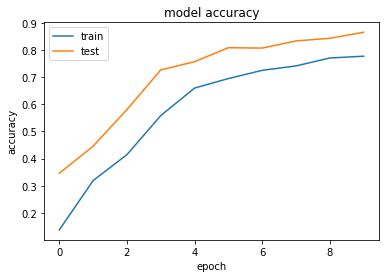

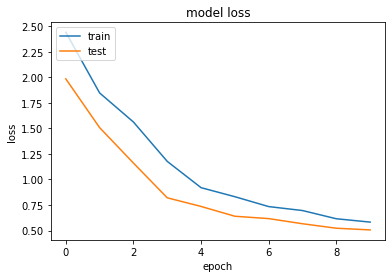

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [61]:
from sklearn.metrics import accuracy_score
x_cnn=x_final_test/255
x_cnn=x_cnn[..., np.newaxis]
predictions = model.predict_classes(x_cnn)
print("accuracy: ", accuracy_score(y_final_test, predictions))

C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


accuracy:  0.8575


In [63]:
y_final_test

array([7, 0, 5, 2, 2, 9, 2, 5, 3, 0, 9, 1, 1, 3, 1, 6, 6, 5, 5, 1, 0, 9,
       8, 0, 9, 2, 8, 9, 2, 9, 4, 6, 1, 8, 2, 2, 9, 3, 3, 8, 1, 1, 0, 2,
       9, 3, 4, 0, 4, 1, 7, 8, 1, 9, 0, 5, 4, 0, 3, 3, 6, 7, 1, 2, 0, 6,
       5, 5, 1, 7, 3, 0, 1, 9, 6, 5, 9, 4, 6, 0, 0, 5, 8, 6, 1, 6, 7, 2,
       2, 5, 8, 2, 8, 4, 6, 9, 6, 6, 1, 6, 2, 0, 1, 3, 0, 0, 3, 8, 8, 3,
       5, 9, 9, 7, 1, 1, 7, 8, 9, 3, 2, 0, 6, 0, 4, 8, 9, 4, 6, 7, 3, 9,
       4, 2, 4, 8, 6, 5, 9, 0, 3, 7, 3, 5, 4, 1, 2, 4, 9, 0, 7, 9, 3, 0,
       4, 2, 2, 7, 8, 9, 5, 8, 4, 8, 2, 4, 4, 3, 5, 2, 1, 3, 2, 3, 7, 2,
       5, 1, 0, 0, 3, 3, 8, 4, 1, 7, 7, 5, 7, 4, 3, 3, 7, 2, 8, 5, 8, 5,
       7, 8, 4, 5, 7, 8, 7, 3, 0, 0, 6, 4, 5, 2, 4, 8, 6, 2, 9, 6, 9, 7,
       9, 4, 7, 3, 3, 4, 4, 9, 0, 5, 2, 9, 5, 0, 3, 7, 5, 9, 6, 7, 9, 3,
       1, 8, 0, 2, 8, 2, 6, 7, 3, 6, 4, 7, 1, 9, 1, 2, 6, 4, 3, 0, 0, 0,
       4, 3, 8, 8, 5, 2, 1, 5, 7, 7, 4, 1, 7, 5, 6, 8, 0, 6, 9, 2, 5, 8,
       5, 4, 2, 5, 1, 1, 0, 6, 4, 8, 0, 9, 5, 6, 7,

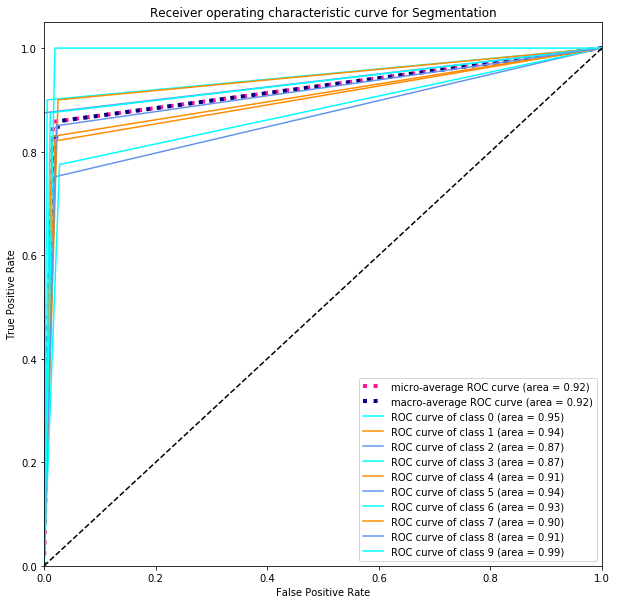

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

y_test=to_categorical(y_final_test,10)
y_score = to_categorical(predictions,10)
n_classes=10
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])





all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, 
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve for Segmentation')
plt.legend(loc="lower right",prop={'size': 10})
plt.show()

In [70]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(predictions, y_final_test)
cm

array([[36,  0,  0,  0,  1,  0,  1,  0,  0,  0],
       [ 1, 36,  5,  0,  0,  0,  2,  1,  0,  0],
       [ 0,  1, 30,  1,  1,  0,  2,  0,  0,  0],
       [ 0,  0,  2, 31,  4,  3,  0,  0,  1,  0],
       [ 0,  1,  0,  3, 34,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  0],
       [ 0,  2,  1,  1,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0, 32,  5,  0],
       [ 0,  0,  2,  1,  0,  0,  0,  5, 34,  0],
       [ 3,  0,  0,  1,  1,  1,  0,  1,  0, 40]], dtype=int64)